In [1]:
from collections import defaultdict
import os
import pandas as pd
import numpy as np

#SK Learn Packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#Misc Stats Packages
import statsmodels.api as sm

#VIF Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Forward and Backwards selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Ploting Packages
import matplotlib.pyplot as plt
from colour import Color

import warnings
warnings.filterwarnings("ignore")

# set your working directory to "Team-51" 
path = "D:\\2022\\Team-51"
jc_path = r"C:\Users\JCascioli\Desktop\Georgia_Tech\Semester 7 - MGT 6203 - Data Analytics in Business\Project\Team-51"
#os.chdir(path)
os.chdir(path)

os.getcwd()

'D:\\2022\\Team-51'

In [2]:
# # if we want to switch from showing all rows vs the default view

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# # pd.reset_option('display.max_columns', None)
# # pd.reset_option('display.max_rows', None)

## Data Preparation


#### Load final dataset

In [3]:
df_final = pd.read_csv("Data\\final_data_clean.csv")
df_final = df_final[list(df_final.columns[1:])]    # need to change to 3 for final dataset

# shape
df_final.shape

(1414, 30)

In [4]:
df_final.head()

,communityName,state,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,...,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding
0,Aberdeen,NJ,2.89,26.94,7.59,19.87,2.93,12.82,3.18,17.15,...,0.015553,95.71,80.47,6.42,44.91,0.0,0.29732,0,4.633333,48.823333
1,Ada,OK,2.37,30.44,17.77,36.76,10.01,0.19,22.93,29.43,...,0.058850,87.75,56.21,3.97,41.14,0.0,0.53285,0,12.010000,63.510000
2,Agoura Hills,CA,3.08,24.89,3.61,10.53,1.58,0.62,3.53,7.13,...,0.015547,95.42,83.40,0.63,15.77,0.0,0.36876,0,1.110000,42.940000
3,Aiken,SC,2.56,23.43,14.62,30.95,8.48,0.00,15.69,20.62,...,0.039956,90.71,66.18,3.02,37.78,0.0,0.50420,0,7.870000,58.270000
4,Alabaster,AL,2.99,27.21,6.64,15.10,3.72,0.14,5.65,22.15,...,0.015137,95.66,82.71,0.00,21.97,0.0,0.13794,0,5.100000,57.450000


#### Drop regional data (community, state, population)

In [5]:
# select numerical variables
df_selected = df_final[list(df_final.columns[2:])]    # need to change to 3 for final dataset
# df_selected.shape
df_selected.shape

(1414, 28)

In [6]:
df_selected.head()

,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,PctBSorMore,PctUnemployed,...,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding
0,2.89,26.94,7.59,19.87,2.93,12.82,3.18,17.15,28.03,5.16,...,0.015553,95.71,80.47,6.42,44.91,0.0,0.29732,0,4.633333,48.823333
1,2.37,30.44,17.77,36.76,10.01,0.19,22.93,29.43,23.32,8.39,...,0.058850,87.75,56.21,3.97,41.14,0.0,0.53285,0,12.010000,63.510000
2,3.08,24.89,3.61,10.53,1.58,0.62,3.53,7.13,44.15,3.61,...,0.015547,95.42,83.40,0.63,15.77,0.0,0.36876,0,1.110000,42.940000
3,2.56,23.43,14.62,30.95,8.48,0.00,15.69,20.62,33.06,4.96,...,0.039956,90.71,66.18,3.02,37.78,0.0,0.50420,0,7.870000,58.270000
4,2.99,27.21,6.64,15.10,3.72,0.14,5.65,22.15,24.38,2.83,...,0.015137,95.66,82.71,0.00,21.97,0.0,0.13794,0,5.100000,57.450000


(Regional information retrieved by index)

## Preview

Dependent variable and independent variables


In [7]:
y_col = 'ViolentCrimesPerPop'
x_cols = [c for c in df_selected.columns if c != y_col]

# print(x_cols)
# print(len(x_cols))


## Split data

#### X and y

In [8]:
# X
X = df_selected[x_cols]
# print(X.shape)

# y
y = df_selected[y_col]

# preview X, y
# X.head()
# y.head()

#### train & test set

In [9]:
# train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
X_train.head()

,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,PctBSorMore,PctUnemployed,...,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,has_pp_access,PctFedEduFunding,PctStateEduFunding
655,3.01,30.50,10.77,28.06,7.96,0.33,19.40,35.18,13.62,6.83,...,1.46,0.045689,87.91,71.47,3.91,50.86,0.000000,0,8.55,25.54
37,3.10,26.78,2.29,7.31,2.30,2.11,3.49,4.59,36.59,3.49,...,1.25,0.011359,96.59,87.38,0.51,27.99,0.000000,0,6.70,68.23
602,2.38,26.43,10.67,19.69,5.32,1.67,10.39,20.15,20.84,2.86,...,1.99,0.072366,85.30,42.06,1.84,20.87,0.000000,0,6.68,14.99
858,2.55,26.02,13.76,29.24,6.61,21.37,9.49,35.46,18.21,7.69,...,3.89,0.047590,89.17,39.98,1.78,26.69,0.000000,0,4.17,37.60
167,2.38,26.98,13.20,23.57,6.77,3.23,8.32,20.32,22.92,5.12,...,3.52,0.020728,95.29,45.70,1.24,21.17,0.000059,1,4.70,53.40


In [10]:
y_train.head()

655    0.24347
37     0.67362
602    1.52392
858    0.29430
167    0.49118
Name: ViolentCrimesPerPop, dtype: float64

## VIF Analysis

Resources:
https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b


In [11]:
def compute_vif(considered_features,data_frame):
    
    X_vif = data_frame[considered_features]
    # the calculation of variance inflation requires a constant
    X_vif['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [12]:
#Analyze all features
considered_features = list(X.columns)
print(considered_features)
len(considered_features)

['householsize', 'agePct12t29', 'agePct65up', 'pctWSocSec', 'pctWPubAsst', 'PctUsePubTrans', 'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'PersPerFam', 'PctFam2Par', 'PctWorkMom', 'PctKidsBornNeverMar', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'LemasPctOfficDrugUn', 'has_pp_access', 'PctFedEduFunding', 'PctStateEduFunding']


27

In [13]:
# compute vif 
compute_vif(considered_features,data_frame=X).sort_values('VIF', ascending=False)

,Variable,VIF
13,PctOccupMgmtProf,21.082320
3,pctWSocSec,20.899828
2,agePct65up,20.450051
8,PctBSorMore,17.432287
15,PctFam2Par,14.615311
12,PctOccupManu,10.461775
19,PctHousOccup,10.413665
18,HousVacant,9.068545
14,PersPerFam,8.720318
6,PctPopUnderPov,8.699885


## Linear Regression


#### Fit model - for whole X

In [14]:
# add constant
X_train_sm = sm.add_constant(X_train)
# fit model
m_linear_all = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear_all.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.596
Model:                             OLS   Adj. R-squared:                  0.585
Method:                  Least Squares   F-statistic:                     52.58
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          1.80e-168
Time:                         22:46:39   Log-Likelihood:                -503.20
No. Observations:                  989   AIC:                             1062.
Df Residuals:                      961   BIC:                             1199.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE of train set


In [15]:
# add constant
X_train_mse = sm.add_constant(X_train)
# fit model
y_pred_mse = m_linear_all.predict(X_train_mse)

# model summary
mse = mean_squared_error(y_train, y_pred_mse)
print(mse)

0.16197854127543576


#### MSE of test set

In [16]:
# add constant
X_test_mse = sm.add_constant(X_test)
# fit model
y_pred_mse = m_linear_all.predict(X_test_mse)

# model summary
mse = mean_squared_error(y_test, y_pred_mse)
print(mse)

0.13383647388345765


#### Variables with p-value < 0.05

Output table is sorted by p value in ascending order.

In [17]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear_all.pvalues)) if m_linear_all.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear_all.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear_all.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)


,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
18,PctKidsBornNeverMar,0.0791,0.011,7.208,0.058,0.101,1.147871e-12
16,PctFam2Par,-0.0221,0.005,-4.455,-0.032,-0.012,9.358252e-06
17,PctWorkMom,-0.0101,0.003,-3.811,-0.015,-0.005,1.473465e-04
27,PctStateEduFunding,0.0032,0.001,3.045,0.001,0.005,2.388961e-03
23,PctVacMore6Mos,-0.0036,0.001,-2.746,-0.006,-0.001,6.141230e-03
22,PctVacantBoarded,0.0146,0.006,2.499,0.003,0.026,1.262581e-02
11,PctEmplManu,-0.0070,0.003,-2.216,-0.013,-0.001,2.689205e-02
12,PctEmplProfServ,-0.0091,0.004,-2.170,-0.017,-0.001,3.024961e-02


#### Train linear regression model again

In [18]:
X_linear_final = list(sorted_df["significant factors (95% CI)"])

# add constant
X_train_sm = sm.add_constant(X_train[X_linear_final])
# fit model
m_linear_final = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear_final.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.574
Model:                             OLS   Adj. R-squared:                  0.571
Method:                  Least Squares   F-statistic:                     165.1
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          9.64e-176
Time:                         22:46:39   Log-Likelihood:                -529.82
No. Observations:                  989   AIC:                             1078.
Df Residuals:                      980   BIC:                             1122.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

####  MSE of train set

In [19]:
# add constant
X_train_mse = sm.add_constant(X_train[X_linear_final])
# fit model
y_pred_mse = m_linear_final.predict(X_train_mse)

# model summary
mse = mean_squared_error(y_train, y_pred_mse)
print(mse)

0.17093997355101834


#### MSE of test set

In [20]:
# add constant
X_test_mse = sm.add_constant(X_test[X_linear_final])
# fit model
y_pred_mse = m_linear_final.predict(X_test_mse)

# model summary
mse = mean_squared_error(y_test, y_pred_mse)
print(mse)

0.13783948868552356


#### Sort significant features

In [21]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear_final.pvalues)) if m_linear_final.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear_final.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear_final.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
1,PctKidsBornNeverMar,0.0929,0.008,11.294,0.077,0.109,6.832948e-28
8,PctEmplProfServ,-0.0157,0.002,-7.006,-0.020,-0.011,4.564552e-12
2,PctFam2Par,-0.0145,0.003,-5.666,-0.020,-0.009,1.917703e-08
7,PctEmplManu,-0.0099,0.002,-5.437,-0.013,-0.006,6.842082e-08
3,PctWorkMom,-0.0100,0.002,-4.806,-0.014,-0.006,1.777686e-06
5,PctVacMore6Mos,-0.0033,0.001,-3.196,-0.005,-0.001,1.435925e-03
6,PctVacantBoarded,0.0156,0.006,2.821,0.005,0.026,4.885132e-03
4,PctStateEduFunding,0.0020,0.001,2.347,0.000,0.004,1.911704e-02


#### Record model metrics (Linear Regression - Test)

In [22]:
model_1 = pd.DataFrame({"Model": ["Linear Regression"], 
                        "Features": [X_linear_final],
                        "R-squared": [0.574], 
                        "Adj. R-squared": [0.571], 
                        "AIC": [1119.], 
                        "MSE": [mse]})
records = model_1
records

,Model,Features,R-squared,Adj. R-squared,AIC,MSE
0,Linear Regression,"[PctKidsBornNeverMar, PctFam2Par, PctWorkMom, ...",0.574,0.571,1119.0,0.137839


************

## Sequential Feature Selection

Similar to forward feature selection

In [23]:
estimator = LinearRegression()

selector = sfs(estimator, k_features=15, forward=True, floating=False, verbose=2, scoring="neg_mean_squared_error", cv=5)
selector = selector.fit(X_train, y_train)

# metrics
selector.get_metric_dict()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished

[2022-11-19 22:46:39] Features: 1/15 -- score: -0.19960933771174802[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.1s finished

[2022-11-19 22:46:39] Features: 2/15 -- score: -0.19127640226856008[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished

[2022-11-19 22:46:40] Features: 3/15 -- score: -0.18706270116452134[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

{1: {'feature_idx': (17,),
  'cv_scores': array([-0.20597747, -0.17791558, -0.16552436, -0.27308979, -0.17553948]),
  'avg_score': -0.19960933771174802,
  'feature_names': ('PctKidsBornNeverMar',),
  'ci_bound': 0.05027999049977343,
  'std_dev': 0.039119540785356476,
  'std_err': 0.019559770392678238},
 2: {'feature_idx': (17, 19),
  'cv_scores': array([-0.19565276, -0.16643968, -0.15863893, -0.26058838, -0.17506227]),
  'avg_score': -0.19127640226856008,
  'feature_names': ('PctKidsBornNeverMar', 'PctHousOccup'),
  'ci_bound': 0.04728846416333817,
  'std_dev': 0.03679203166362793,
  'std_err': 0.018396015831813967},
 3: {'feature_idx': (11, 17, 19),
  'cv_scores': array([-0.19672392, -0.15855773, -0.15481653, -0.25435456, -0.17086076]),
  'avg_score': -0.18706270116452134,
  'feature_names': ('PctEmplProfServ', 'PctKidsBornNeverMar', 'PctHousOccup'),
  'ci_bound': 0.047176955011810934,
  'std_dev': 0.036705273755407365,
  'std_err': 0.018352636877703683},
 4: {'feature_idx': (11, 16, 

#### Plot performance metrics

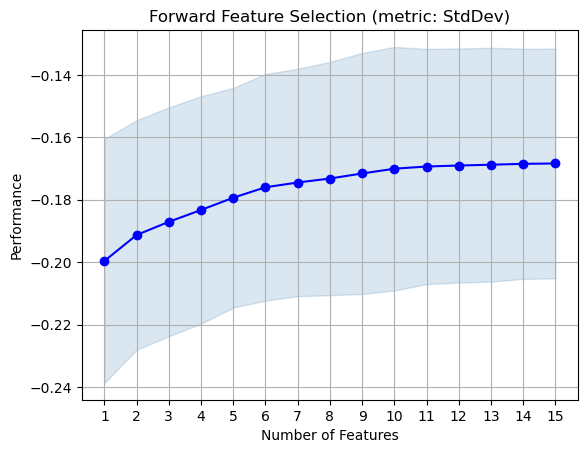

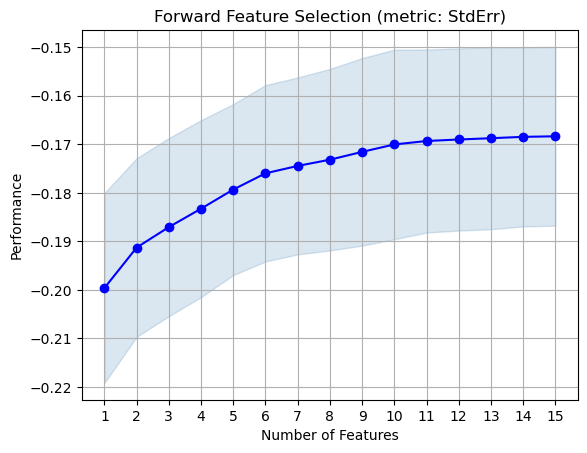

In [24]:
fig = plot_sfs(selector.get_metric_dict(), kind="std_dev")

plt.title("Forward Feature Selection (metric: StdDev)")
plt.grid()
# plt.show()

fig = plot_sfs(selector.get_metric_dict(), kind="std_err")

plt.title("Forward Feature Selection (metric: StdErr)")
plt.grid()
plt.show()



After 10th feature, the model shows minimal improvement

#### Top 10 significant features

In [25]:
forward_chosen = list(selector.k_feature_idx_)[:10]
# print(chosen)
print(list(X_train.columns[forward_chosen]))

['agePct12t29', 'pctWSocSec', 'PctBSorMore', 'PctUnemployed', 'PctEmplManu', 'PctEmplProfServ', 'PersPerFam', 'PctFam2Par', 'PctWorkMom', 'PctKidsBornNeverMar']


#### Train results on linear regression

In [26]:
X_forward_chosen = list(X_train.columns[forward_chosen])
# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
m_linear = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.577
Model:                             OLS   Adj. R-squared:                  0.572
Method:                  Least Squares   F-statistic:                     133.3
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          6.75e-175
Time:                         22:46:42   Log-Likelihood:                -526.61
No. Observations:                  989   AIC:                             1075.
Df Residuals:                      978   BIC:                             1129.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Filter p-value < 0.05

In [27]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
10,PctKidsBornNeverMar,0.0784,0.010,7.895,0.059,0.098,7.735563e-15
8,PctFam2Par,-0.0279,0.004,-7.308,-0.035,-0.020,5.623188e-13
5,PctEmplManu,-0.0092,0.002,-5.072,-0.013,-0.006,4.708153e-07
9,PctWorkMom,-0.0106,0.002,-4.398,-0.015,-0.006,1.212890e-05
6,PctEmplProfServ,-0.0137,0.004,-3.901,-0.021,-0.007,1.021594e-04
1,agePct12t29,-0.0096,0.003,-3.364,-0.015,-0.004,7.968248e-04
7,PersPerFam,0.2339,0.089,2.625,0.059,0.409,8.795014e-03


#### Train model (Forward Selection + Linear Regression filter)

In [28]:
X_forward_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
m_linear_forward = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear_forward.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.570
Model:                             OLS   Adj. R-squared:                  0.567
Method:                  Least Squares   F-statistic:                     185.5
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          1.03e-174
Time:                         22:46:42   Log-Likelihood:                -534.91
No. Observations:                  989   AIC:                             1086.
Df Residuals:                      981   BIC:                             1125.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE of train set

In [29]:
# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
y_pred_train = m_linear_forward.predict(X_train_sm)

# model summary
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

0.17270639940330038


#### MSE of test set

In [30]:
# add constant
X_test_sm = sm.add_constant(X_test[X_forward_chosen])
# fit model
y_pred_test = m_linear_forward.predict(X_test_sm)

# model summary
mse = mean_squared_error(y_test, y_pred_test)
print(mse)

0.14150345387638388


#### Filter p-value < 0.05

In [31]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear_forward.pvalues)) if m_linear_forward.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear_forward.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear_forward.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
1,PctKidsBornNeverMar,0.0931,0.009,10.131,0.075,0.111,5.221174e-23
2,PctFam2Par,-0.0185,0.003,-6.352,-0.024,-0.013,3.237217e-10
3,PctEmplManu,-0.0105,0.002,-5.820,-0.014,-0.007,7.969956e-09
5,PctEmplProfServ,-0.0132,0.003,-5.133,-0.018,-0.008,3.429022e-07
4,PctWorkMom,-0.0091,0.002,-4.071,-0.013,-0.005,5.065244e-05
6,agePct12t29,-0.0067,0.002,-2.815,-0.011,-0.002,4.975109e-03


#### Train model (Forward Selection + Linear Regression filter)

In [32]:
X_forward_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
m_linear_forward = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear_forward.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.568
Model:                             OLS   Adj. R-squared:                  0.565
Method:                  Least Squares   F-statistic:                     215.1
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          4.43e-175
Time:                         22:46:42   Log-Likelihood:                -536.82
No. Observations:                  989   AIC:                             1088.
Df Residuals:                      982   BIC:                             1122.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE of train set

In [33]:
# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
y_pred_train = m_linear_forward.predict(X_train_sm)

# model summary
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

0.17337439366566967


#### MSE of test set

In [34]:
# add constant
X_test_sm = sm.add_constant(X_test[X_forward_chosen])
# fit model
y_pred_test = m_linear_forward.predict(X_test_sm)

# model summary
mse = mean_squared_error(y_test, y_pred_test)
print(mse)

0.14260417668741593


#### Record model metrics (Forward Selection - Test)

In [35]:
model_2 = pd.DataFrame({"Model": ["Forward Selection"], 
                        "Features": [X_forward_chosen],
                        "R-squared": [0.570], 
                        "Adj. R-squared": [0.567], 
                        "AIC": [1086.], 
                        "MSE": [mse]})
records = pd.concat([records, model_2], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,MSE
0,Linear Regression,"[PctKidsBornNeverMar, PctFam2Par, PctWorkMom, ...",0.574,0.571,1119.0,0.137839
1,Forward Selection,"[PctKidsBornNeverMar, PctFam2Par, PctEmplManu,...",0.570,0.567,1086.0,0.142604


## Recursive Feature Elimination

Similar to backward feature elimination

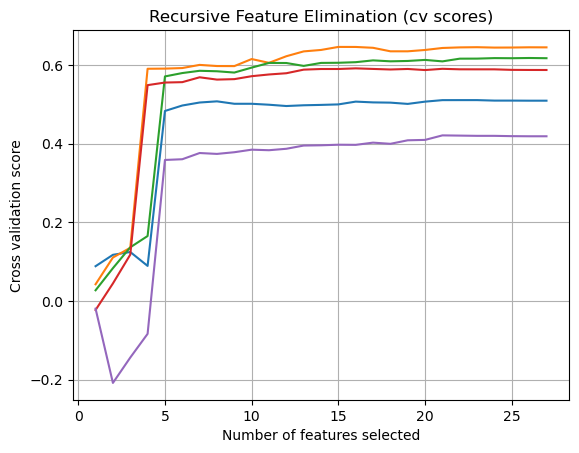

In [36]:
# x, y for rfe
# x_rfe = X_train
# y_rfe = y_train
names = pd.DataFrame(X_train.columns)

estimator = LinearRegression()

selector = RFECV(estimator, step=1, cv=5)
# selector = selector.fit(x_rfe, y_rfe)
# selector.support_
# selector.ranking_

selector.fit(X_train, y_train)
selector.grid_scores_

n = len(list(selector.ranking_)) + 1
plt.plot(range(1, n), selector.grid_scores_)
plt.title("Recursive Feature Elimination (cv scores)")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.grid()
plt.show()


#### Top 12 features

In [37]:
rankings = pd.DataFrame(selector.ranking_)
# rankings.head()

rankings = pd.concat([names, rankings], axis=1)
rankings.columns = ["Feature", "Rank"]

rankings = rankings.sort_values(by="Rank")
rankings.head(12)


,Feature,Rank
0,householsize,1
24,has_pp_access,1
23,LemasPctOfficDrugUn,1
22,PctVacMore6Mos,1
21,PctVacantBoarded,1
19,PctHousOccup,1
18,HousVacant,1
17,PctKidsBornNeverMar,1
16,PctWorkMom,1
15,PctFam2Par,1


#### Train backward elimination results on linear regression

In [38]:
X_backward_chosen = list(rankings["Feature"])[:12]

# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
m_linear = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear.summary())
# print(m_linear.pvalues)

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.576
Model:                             OLS   Adj. R-squared:                  0.571
Method:                  Least Squares   F-statistic:                     110.4
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          2.57e-172
Time:                         22:46:42   Log-Likelihood:                -527.68
No. Observations:                  989   AIC:                             1081.
Df Residuals:                      976   BIC:                             1145.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Filter p-value < 0.05

In [39]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
# sorted_df = sorted_df.drop(labels=[0], axis=0)
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
8,PctKidsBornNeverMar,0.0908,0.010,9.552,0.072,0.109,9.901026e-21
4,PctVacMore6Mos,-0.0057,0.001,-5.260,-0.008,-0.004,1.771074e-07
11,PersPerFam,0.4206,0.100,4.206,0.224,0.617,2.843733e-05
9,PctWorkMom,-0.0084,0.002,-3.749,-0.013,-0.004,1.882310e-04
1,householsize,-0.2456,0.069,-3.536,-0.382,-0.109,4.256018e-04
10,PctFam2Par,-0.0105,0.003,-3.144,-0.017,-0.004,1.719017e-03
5,PctVacantBoarded,0.0139,0.006,2.430,0.003,0.025,1.526978e-02
3,LemasPctOfficDrugUn,483.0728,223.776,2.159,43.936,922.210,3.111391e-02
6,PctHousOccup,-0.0215,0.010,-2.123,-0.041,-0.002,3.402827e-02


#### Filter p-value < 0.05

In [40]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.loc[sorted_df["significant factors (95% CI)"]!="const"]
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
8,PctKidsBornNeverMar,0.0908,0.010,9.552,0.072,0.109,9.901026e-21
4,PctVacMore6Mos,-0.0057,0.001,-5.260,-0.008,-0.004,1.771074e-07
11,PersPerFam,0.4206,0.100,4.206,0.224,0.617,2.843733e-05
9,PctWorkMom,-0.0084,0.002,-3.749,-0.013,-0.004,1.882310e-04
1,householsize,-0.2456,0.069,-3.536,-0.382,-0.109,4.256018e-04
10,PctFam2Par,-0.0105,0.003,-3.144,-0.017,-0.004,1.719017e-03
5,PctVacantBoarded,0.0139,0.006,2.430,0.003,0.025,1.526978e-02
3,LemasPctOfficDrugUn,483.0728,223.776,2.159,43.936,922.210,3.111391e-02
6,PctHousOccup,-0.0215,0.010,-2.123,-0.041,-0.002,3.402827e-02


#### Test model (Backward Elimination + Linear Regression filter)

In [41]:
X_backward_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
m_linear_backward = sm.OLS(y_train, X_train_sm).fit()



In [42]:
# model summary
print(m_linear_backward.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.575
Model:                             OLS   Adj. R-squared:                  0.571
Method:                  Least Squares   F-statistic:                     147.1
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          5.03e-175
Time:                         22:46:42   Log-Likelihood:                -528.88
No. Observations:                  989   AIC:                             1078.
Df Residuals:                      979   BIC:                             1127.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE of train set

In [43]:
# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
y_pred_train = m_linear_backward.predict(X_train_sm)

# model summary
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

0.17061278952242148


#### MSE of test set

In [44]:
# add constant
X_test_sm = sm.add_constant(X_test[X_backward_chosen])
# fit model
y_pred_test = m_linear_backward.predict(X_test_sm)

# model summary
mse = mean_squared_error(y_test, y_pred_test)
print(mse)

0.1410043261127048


#### Train model (with "LemasPctOfficDrugUn" removed)

In [45]:
X_backward_chosen = [v for v in X_backward_chosen if v != "LemasPctOfficDrugUn"]

# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
m_linear_backward = sm.OLS(y_train, X_train_sm).fit()


In [46]:
# model summary
print(m_linear_backward.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.569
Method:                  Least Squares   F-statistic:                     164.2
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          4.40e-175
Time:                         22:46:43   Log-Likelihood:                -531.36
No. Observations:                  989   AIC:                             1081.
Df Residuals:                      980   BIC:                             1125.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE of train set

In [47]:
# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
y_pred_train = m_linear_backward.predict(X_train_sm)

# model summary
mse = mean_squared_error(y_train, y_pred_train)
print(mse)

0.17147303165786024


#### MSE of test set

In [48]:
# add constant
X_test_sm = sm.add_constant(X_test[X_backward_chosen])
# fit model
y_pred_test = m_linear_backward.predict(X_test_sm)

# model summary
mse = mean_squared_error(y_test, y_pred_test)
print(mse)

0.140121776280682


#### Record model metrics (Backward Elimination - Test)

In [49]:
model_3 = pd.DataFrame({"Model": ["Backward Elimination"], 
                        "Features": [X_backward_chosen],
                        "R-squared": [0.573], 
                        "Adj. R-squared": [0.569], 
                        "AIC": [1081.], 
                        "MSE": [mse]})
records = pd.concat([records, model_3], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,MSE
0,Linear Regression,"[PctKidsBornNeverMar, PctFam2Par, PctWorkMom, ...",0.574,0.571,1119.0,0.137839
1,Forward Selection,"[PctKidsBornNeverMar, PctFam2Par, PctEmplManu,...",0.570,0.567,1086.0,0.142604
2,Backward Elimination,"[PctKidsBornNeverMar, PctVacMore6Mos, PersPerF...",0.573,0.569,1081.0,0.140122


#### Final Touch up

In [50]:
X_linear_final = [v for v in X_linear_final if v not in ["PctVacMore6Mos", "PctEmplManu"]]
# print(X_linear_final)

# add constant
X_train_sm = sm.add_constant(X_train[X_linear_final])
# fit model
m_linear_final = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear_final.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.554
Model:                             OLS   Adj. R-squared:                  0.551
Method:                  Least Squares   F-statistic:                     203.4
Date:                 Sat, 19 Nov 2022   Prob (F-statistic):          2.12e-168
Time:                         22:46:43   Log-Likelihood:                -552.36
No. Observations:                  989   AIC:                             1119.
Df Residuals:                      982   BIC:                             1153.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### MSE(train)

In [51]:
# add constant
X_train_mse = sm.add_constant(X_train[X_linear_final])
# fit model
y_pred_mse = m_linear_final.predict(X_train_mse)

# model summary
mse = mean_squared_error(y_train, y_pred_mse)
print(mse)

0.17890988682285927


#### MSE(test)

In [52]:
# add constant
X_test_sm = sm.add_constant(X_test[X_linear_final])
# fit model
y_pred_test = m_linear_final.predict(X_test_sm)

# model summary
mse = mean_squared_error(y_test, y_pred_test)
print(mse)

0.1450256604383697


#### Scatterplots (for winner: linear regression)

In highlighted(orange) scatter plots are variables our linear regression model has found to be significant. 

The darker the color, the more significant the variable.

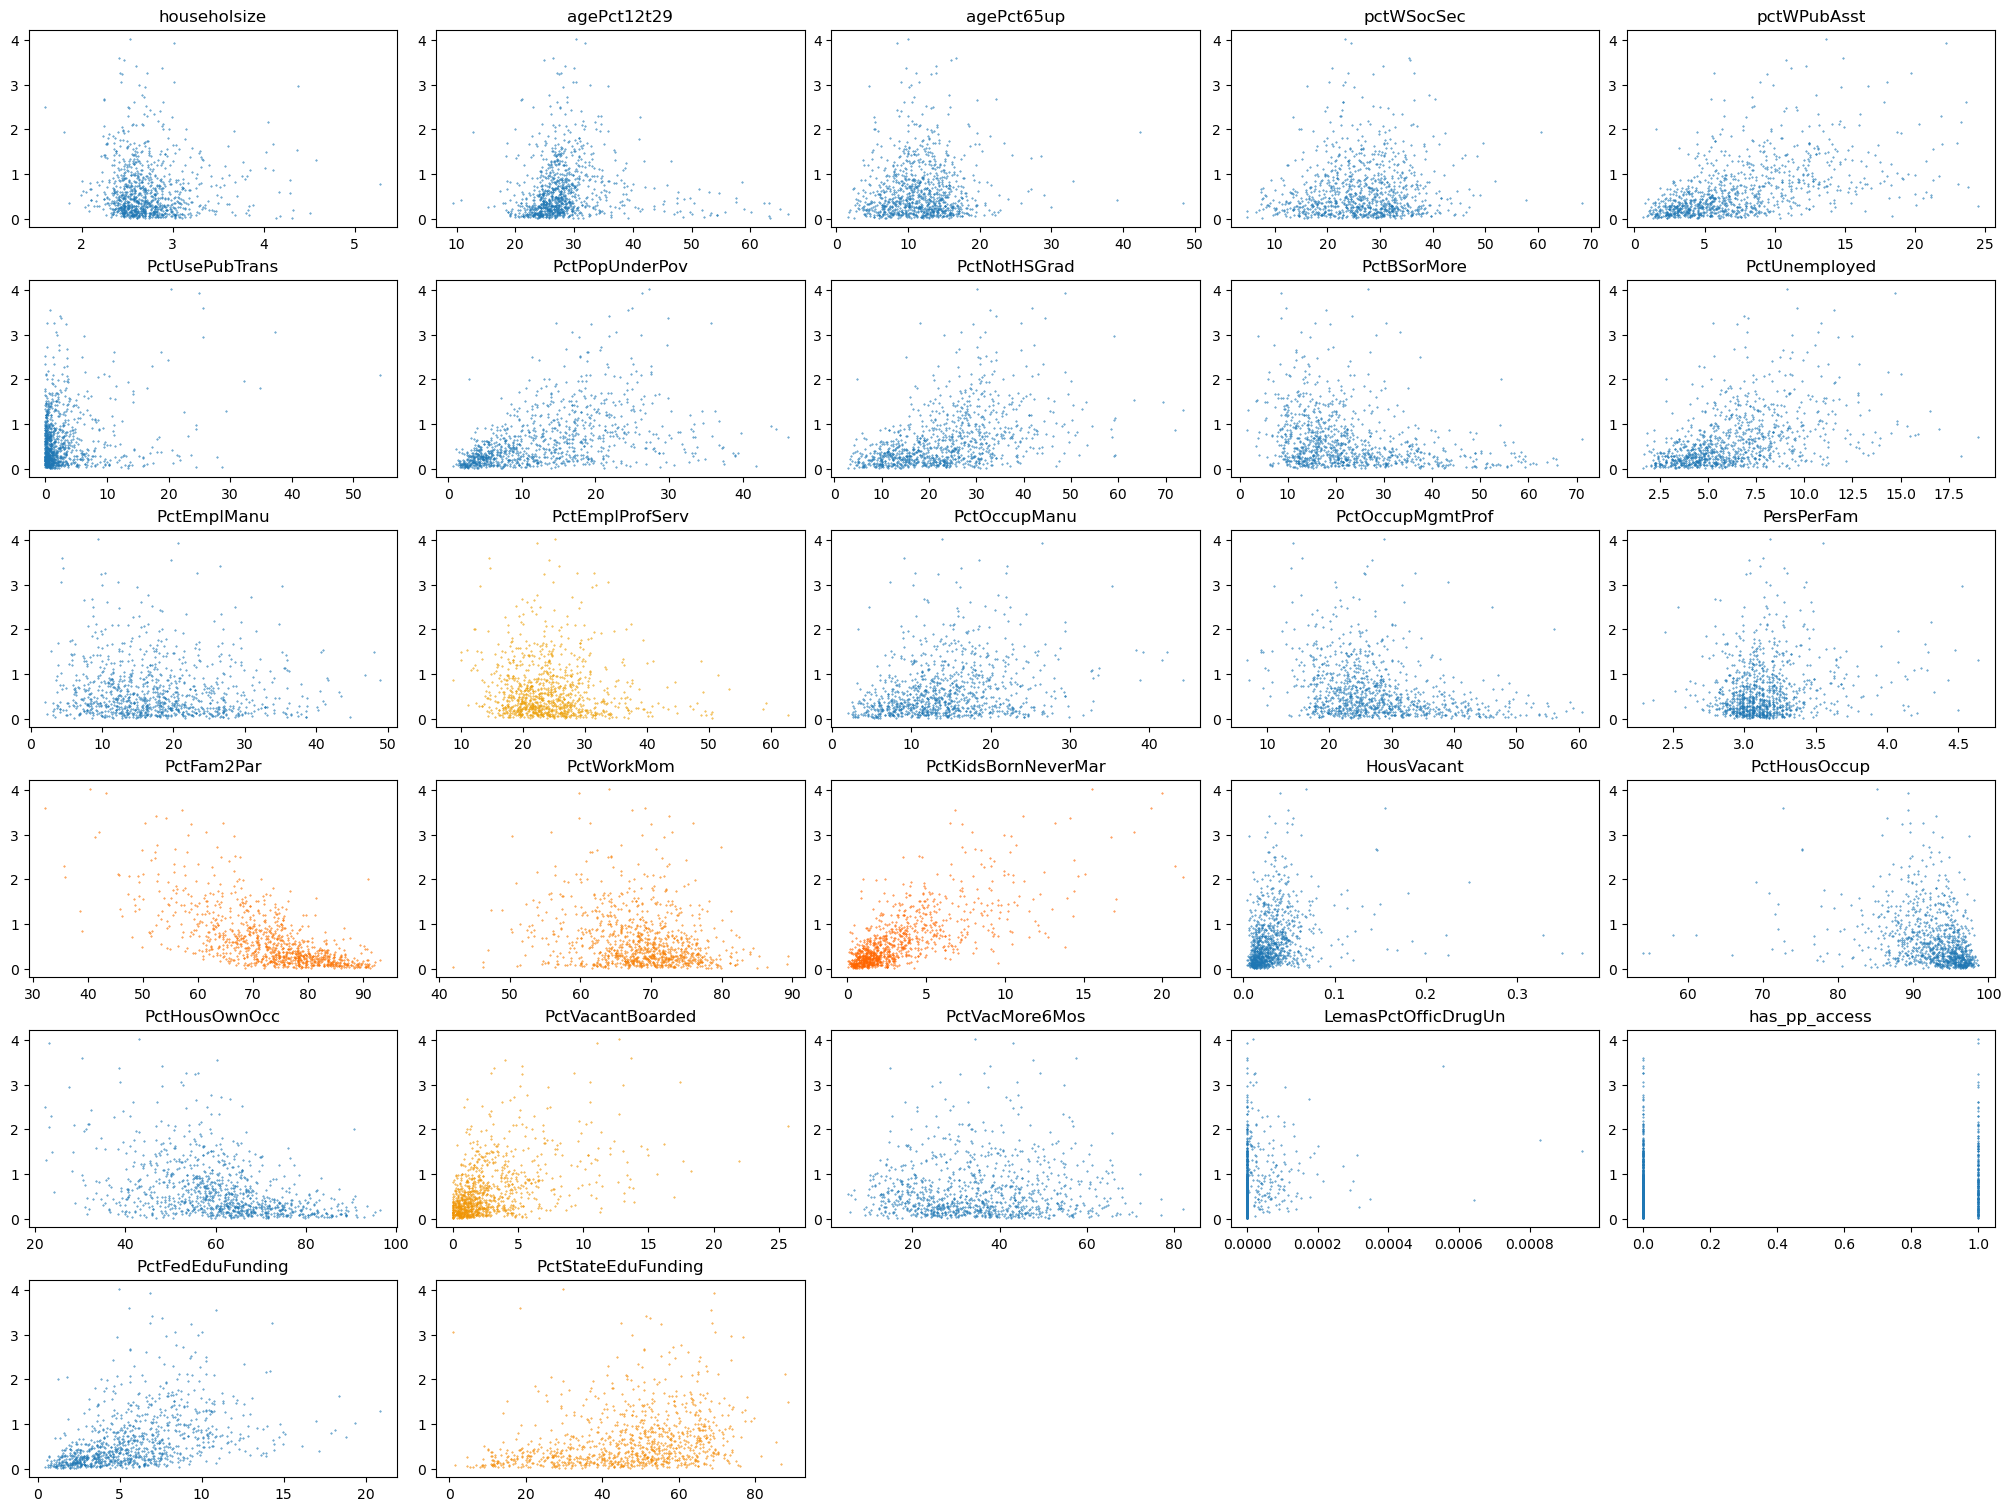

In [53]:
# significant variables
sorting = list(X_linear_final)
oranges = list(Color("#ff6600").range_to(Color("#ec9f05"), len(sorting)))

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15), constrained_layout=True)

fig.delaxes(axes[5][2])
fig.delaxes(axes[5][3])
fig.delaxes(axes[5][4])

for ax, col in zip(axes.flat, X_train):
    ax.set_title(col)
    if col in sorting:
        i = sorting.index(col)
        ax.scatter(x=X_train[col], y=y_train, s=0.15, color=oranges[i].hex)
    else:
        ax.scatter(x=X_train[col], y=y_train, s=0.15)